In [158]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [159]:
img = cv2.imread('altocumulus.jpg')

b,g,r = cv2.split(img)
B = np.array(b)
R = np.array(r)

In [160]:
tmp = R / B

In [161]:
x = (tmp-tmp.min())/(tmp.max()-tmp.min())*255

In [162]:
x = np.round(x)
x = x.astype(np.uint8)

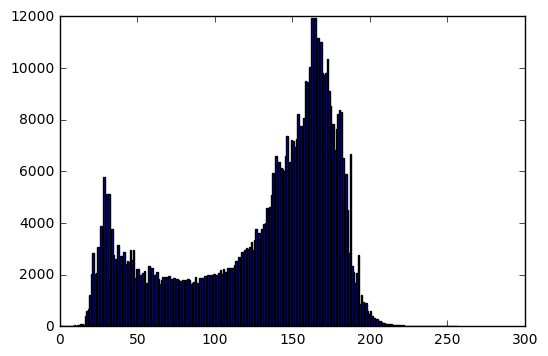

In [163]:
plt.hist(x.ravel(), 256, [0,256])
plt.show()

In [164]:
T, res = cv2.threshold(x,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [165]:
theta = 1.3

In [166]:
hand_constraint = np.zeros((x.shape[0],x.shape[1]), np.uint8)

In [167]:
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if x[i][j] > theta * T:
            hand_constraint[i][j] = 1
        elif x[i][j] < 1 / theta * T:
            hand_constraint[i][j] = 0
        else:
            hand_constraint[i][j] = 2

In [168]:
bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

In [169]:
mask, bgdModel, fgdModel = cv2.grabCut(img, hand_constraint, None, bgdModel, fgdModel, iterCount=5, mode=cv2.GC_INIT_WITH_MASK )

In [170]:
# mask为0则输出0，否则输出1
mask = np.where((mask==1),1,0).astype('uint8')

In [172]:
mask = mask * 255

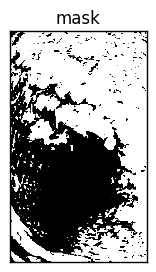

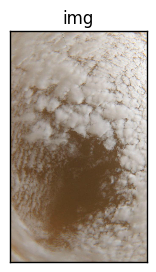

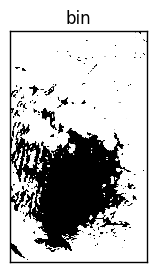

In [173]:
plt.subplot(1,3,1)
plt.imshow(mask, cmap = 'gray')
plt.title('mask')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(1,3,2)
plt.imshow(img, cmap = 'gray')
plt.title('img')
plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(1,3,3)
plt.imshow(res, cmap = 'gray')
plt.title('bin')
plt.xticks([]), plt.yticks([])
plt.show()

In [174]:
cv2.imwrite('AGC.jpg', mask)

True